In [1]:
using Pkg
Pkg.activate("../")

using Plots

using Revise
using MarkovModels

 Activating environment at `~/GithubRepositories/MarkovModels/Project.toml`
┌ Info: Precompiling MarkovModels [c2ae6250-d0a1-11ea-0991-234599ce5244]
└ @ Base loading.jl:1278


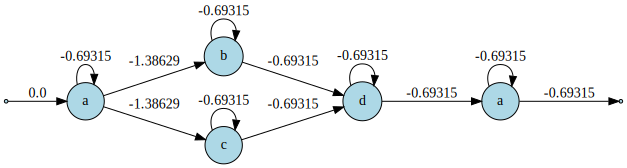

In [2]:
fsm = FSM()
s1 = addstate!(fsm, pdfindex = 1, label = "a")
s2 = addstate!(fsm, pdfindex = 2, label = "b")
s3 = addstate!(fsm, pdfindex = 3, label = "c")
s4 = addstate!(fsm, pdfindex = 4, label = "d")
s5 = addstate!(fsm, pdfindex = 1, label = "a")

link!(fsm, initstate(fsm), s1)

# Self-loops
link!(fsm, s1, s1, log(1/2))
link!(fsm, s2, s2, log(1/2))
link!(fsm, s3, s3, log(1/2))
link!(fsm, s4, s4, log(1/2))
link!(fsm, s5, s5, log(1/2))

link!(fsm, s1, s2, log(1/4))
link!(fsm, s1, s3, log(1/4))
link!(fsm, s2, s4, log(1/2))
link!(fsm, s3, s4, log(1/2))
link!(fsm, s4, s5, log(1/2))
link!(fsm, s5, finalstate(fsm), log(1/2))

fsm

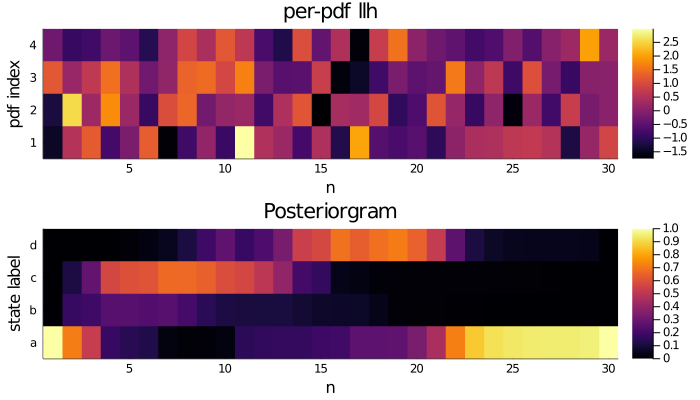

In [3]:
# We have 4 different pdfs 
S = 4

# Fake per-pdf log-likelihood
N = 30
llhs = randn(S, N) 

lnαβ, totllh = αβrecursion(fsm, llhs)
γ = resps(fsm, lnαβ, dense = true)


plot_llhs = heatmap(
    llhs, 
    title = "per-pdf llh", 
    size = (600, 200),
    ylabel = "pdf index",
    xlabel = "n"
)
plot_posts = heatmap(
    γ, 
    title = "Posteriorgram",
    size = (700, 250),
    yticks = (1:4, ["a", "b", "c", "d"]),
    xlabel = "n",
    ylabel = "state label"
)
plot(plot_llhs, plot_posts, layout = (2, 1), size = (700, 400))